# Task 2 (Supervised Learning)
In this regression task we will predict the percentage of marks that a student is expected
to score based upon the number of hours they studied. This a simple linear regression task 
as it includes two variables.
After training the model predict the marks scored by a student who studies for 9.25 hours.

# Importing the libraries
Here we are going to import all the required libraries for our task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
Here we will load the data into our jupyter notebook by the url given to us.

In [2]:
url = 'http://bit.ly/w-data'

#Loading the data in csv format
data = pd.read_csv(url)
data.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploring the dataset
Here we will explore the dataset that is we are going to have look into the shape of data,
number of rows and column, head and tail etc.

In [3]:
# Printing the shape of the dataset
print("Shape: ",data.shape)
print("________________________________________________________")
#Printing head of the data.
print(data.head())
print("________________________________________________________")
#Printing the tail of the data.
print(data.tail())

Shape:  (25, 2)
________________________________________________________
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
________________________________________________________
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
# Checking if there is any null values in data or not.
print(data.isnull().sum())

Hours     0
Scores    0
dtype: int64


So as we can see above there is not any null values in the given dataset so now we can move ahead.

# Plotting the data
Now we will plot the data to see if there's any kind of relation in them or not.

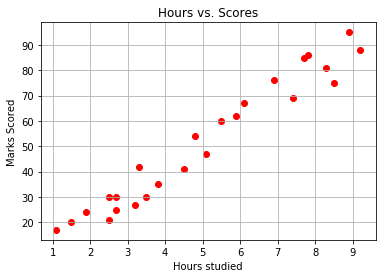

In [5]:
#plotting the data using matplotlib
plt.scatter(data['Hours'],data['Scores'],color='r')
plt.xlabel('Hours studied')
plt.ylabel('Marks Scored')
plt.title('Hours vs. Scores')
plt.grid(True)
plt.show()

# Plotting the heatmap of the data
As we have seen above in the scatter plot that there is kind of linear relationship in
Hours and Scores so before using linear regression let's check if there's any kind of correlation between them 
or not.

In [6]:
#Finding the correlation matrix of the data
corr = data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


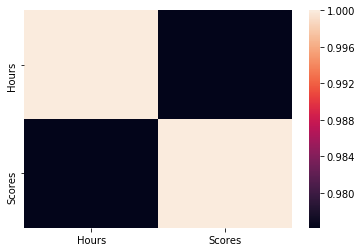

In [7]:
# Plotting the heatmap.
sns.heatmap(corr)

Now that we have seen the correlation of the data, so we can move further to apply Linear Regression on our
data.

# Pre-processing the data
Before jumping into the fitting and prediction we first need to pre-process our data so that it's easier for us to
pass the data into linear regression functions readily.

In [8]:
# X is the feature for Linear Regression
X = data.iloc[:,:-1].values
# Y is the response for Linear Regression
Y = data.iloc[:,1].values

# Splitting the data
Now that we have our features and response ready in hands, let's split the data into training and test set.
we will split our data by using test_train_split() method of sklearn.

In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 

# Training the Linear model
Now that our data is split into train and test set so let's just train our model using the train set.
we are going to use LinearRegression of sklearn.

In [10]:
# Importing the LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression  

#Creating Linear Regression object
reg = LinearRegression()  
#Fitting the train set
reg.fit(x_train, y_train) 

print('The Training is complete.')

The Training is complete.


In [11]:
# Coefficients
print('Coeffiecients:',reg.coef_)

# Intercept
print('Intercept:',reg.intercept_)

Coeffiecients: [9.78856669]
Intercept: 2.370815382341881


# Plotting the regression line
Now that we have our data all trained so we will plot the best fit line or regression line using
matplotlib's plot() method.

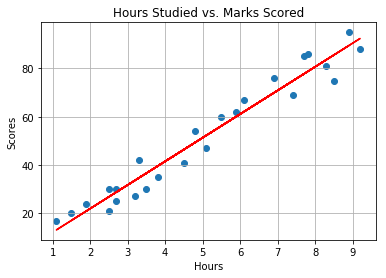

In [12]:
# Plotting for the test data
plt.scatter(X, Y)
# Here mx+c = reg.coef_*X+reg.intercept
plt.plot(X, reg.coef_*X+reg.intercept_,color='r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours Studied vs. Marks Scored')
plt.grid(True)
plt.show()

# Predicting the scores
Now that we have our model all fitted so let's predict the test scores using our model.

In [13]:
# Printing the x_test values
print(x_test)

# Printing the predicted y_pred
y_pred = reg.predict(x_test)
print(y_pred)

print('y_test')
for i in y_test:
    print(i)
print('y_pred')
for i in y_pred:
    print(i)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]
[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]
y_test
20
27
69
30
62
35
24
86
y_pred
17.05366541246545
33.69422877993883
74.80620886428483
26.8422320992145
60.12335883416126
39.56736879198826
20.96909208716507
78.72163553898443


So we can see above the difference in predicted and real response values.

# Accuracy of our model
Here we will check the accuracy of our linear model by using score() function as follows.

In [14]:
reg.score(x_test,y_test)

0.9568211104435257

# Mean squared error
Here we will find the mean squared erroe of our model by using mean_absolute_error().

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652


# Predicting the score of student studying for 9.25 hours.

In [16]:
hours = 9.25
# Predicting the marks scored using the linear model.
score = reg.predict(hours)

print('The student studying for',hours,'hours will score',score)

The student studying for 9.25 hours will score [92.91505723]


So the student studying for 9.25 hours will score 92.91505723 as predicted by our model.